# Reinforcement learning

Terminology:
- Enviroment
- Agent
- State
- Action
- Reward

## Q-Learning

Q-table (Actions and states)

|     | A1  | A2  | A3  | A4  |
|:--: |:--: |:--: |:--: |:--: |
| s1  |  0  |  0  | 10  |  5  |
| s2  |  5  | 10  |  0  |  0  |
| s3  | 10  |  5  |  0  |  0  |

$ Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action]) $<br>
$ \alpha $: learning rate<br>
$ \gamma $: discount factor

## Q-learnig example

Import gym, made by Open-AI

In [4]:
import gym

Load an eviroment

In [7]:
env = gym.make('FrozenLake-v1')

Interacting with the enviroment

In [11]:
print(env.observation_space.n)
print(env.action_space.n)

16
4


In [18]:
env.reset()

0

In [19]:
action = env.action_space.sample()

In [21]:
new_state, reward, done, info = env.step(action)

In [26]:
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


Building the Q-table

In [27]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [28]:
Q = np.zeros((STATES, ACTIONS))

Constants

In [30]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96 # discount factor

Picking an action

In [31]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

Updating Q values

In [33]:
# Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

Putting everythig together

In [40]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

In [41]:
rewards = []
for episode in range(EPISODES):

    state = env.reset()
    for _ in range(MAX_STEPS):
        
        if RENDER:
            env.render()

        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, done, _ = env.step(action)

        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if done: 
            rewards.append(reward)
            epsilon -= 0.001
            break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[2.68465304e-01 2.81462222e-02 4.47994299e-02 5.48077762e-02]
 [6.27942718e-03 1.09309354e-02 4.67282241e-03 3.53012276e-01]
 [1.54265430e-02 5.13571506e-03 1.51560378e-02 3.27575485e-01]
 [4.50833239e-03 4.03373914e-03 1.06538553e-02 6.26020617e-02]
 [3.65543156e-01 1.22142445e-02 1.99539273e-03 3.53533365e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.82360421e-04 4.67854322e-04 1.62919711e-01 4.95028075e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.16803391e-03 3.41016616e-03 1.53743038e-02 4.63933292e-01]
 [4.59233819e-03 5.89380915e-01 1.83912435e-02 3.35266065e-02]
 [8.66229511e-01 5.46016514e-03 9.66791080e-03 4.21091646e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.63045089e-02 1.22385407e-01 7.66828171e-01 1.00292395e-01]
 [1.99549373e-01 9.55752776e-01 2.05629209e-01 2.34972243e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

Plot the progress

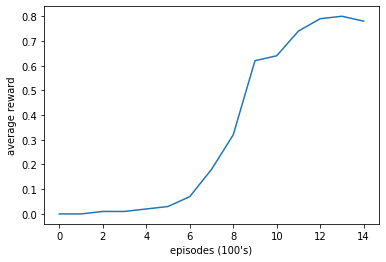

In [42]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()